# Aufgabe 2: Hoch- und Tiefpassfilter
Hochpass- und Tiefpassfilter im Frequenzbereich erlauben Kantenextraktion bzw. Glättung von Bildern, analog zu Faltungen im Ortsbereich.
Dazu werden im fouriertransformierten Bild alle Fourierkoeffizienten innerhalb (idealer Hochpassfilter) bzw. außerhalb (idealer Tiefpassfilter) eines Radius $D_0$ um den Bildmittelpunkt auf $0$ gesetzt.

Verwenden Sie die von `numpy.fft` bereitgestellte Funktionalität zur Berechnung der Fouriertransformation eines Bildes!
Wenden Sie im Frequenzraum jeweils einen idealen Hochpass- und einen idealen Tiefpassfilter an!
Transformieren Sie das veränderte Spektrum zurück in den Ortsbereich (`ifftshift`, `ifft2`) und interpretieren Sie die Ergebnisse!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import PIL.Image
import numpy as np

In [2]:
image_filter = '../Bilder/*.jpg'

## 1. Definition des Filters

Definieren Sie den Filter als binärwertige Funktion in Abhängigkeit vom Radius $D$ und der Konstante $D_0$.

In [6]:
D0 = 30
lowpass_filter = lambda D: (D <= D0).astype(np.float32)
highpass_filter = lambda D: (D > D0).astype(np.float32)

## 2. Laden und Normalisieren des Bildes

In [7]:
image_path = np.random.choice(glob.glob(image_filter))
image = np.asarray(PIL.Image.open(image_path).convert('L'))

In [8]:
image = image.astype(np.float32)
image -= image.min()
image /= image.max()

## 3. Berechnung der Fouriertransformation
Berechnen Sie nun die Fouriertransformation von `image`, indem Sie die entsprechende Funktion aus `numpy.fft` verwenden. Achten Sie darauf, das Spektrum zu zentrieren!

In [9]:
image_transformed = np.fft.fft2(image)
image_transformed = np.fft.fftshift(image_transformed)
image_transformed

array([[  2.0705948+1.77635684e-14j,  -7.5812855+5.15602207e+00j,
        -12.590889 +4.23094368e+00j, ...,  12.129912 -4.60477448e+00j,
        -12.590889 -4.23094368e+00j,  -7.5812855-5.15602207e+00j],
       [ -2.4574468+6.49832392e+00j, -16.632956 +2.88403606e+00j,
         -5.2878785-1.03510895e+01j, ...,  -4.034337 -2.57833314e+00j,
          4.1846247-4.73300171e+00j,  -9.06177  -1.08042402e+01j],
       [ -8.050061 +4.23787165e+00j,  -8.543522 -1.18199759e+01j,
          7.579748 -7.15177107e+00j, ...,  15.276537 -8.63292122e+00j,
         -9.322273 +1.80646455e+00j,  12.410231 -1.15199633e+01j],
       ...,
       [-15.116669 -1.34093797e+00j,   1.0434614-1.44163761e+01j,
          2.9613793+1.80835667e+01j, ..., -23.643042 -4.67746925e+00j,
         10.646461 -2.87276316e+00j,  -8.308578 +5.39649153e+00j],
       [ -8.050061 -4.23787165e+00j,  12.410231 +1.15199633e+01j,
         -9.322273 -1.80646455e+00j, ...,  -1.9541287-1.51049080e+01j,
          7.579748 +7.15177107e+00j

## 4. Filterung

Definieren Sie nun eine Funktion `ex3_filter_spectrum`, die einen gegebenen radiusabhängigen Filter auf ein bereits Fouriertransformiertes Bild anwendet:

In [10]:
def ex3_filter_spectrum(spectrum, radial_filter):
    # Dimensionen des Spektrums
    height, width = spectrum.shape

    # Mittelpunkt des Spektrums
    center_y, center_x = height // 2, width // 2

    # Koordinatengitter erstellen
    y = np.arange(height)
    x = np.arange(width)
    yy, xx = np.meshgrid(y, x, indexing='ij')

    # Abstände vom Mittelpunkt berechnen (Radius D)
    D = np.sqrt((yy - center_y)**2 + (xx - center_x)**2)

    # Filter anwenden (radiusabhängige Gewichtung)
    filter_mask = radial_filter(D)

    # Spektrum mit Filter multiplizieren
    filtered_spectrum = spectrum * filter_mask

    return filtered_spectrum

Das transformierte Bild (Spektrum) wird nun gefiltert:

In [12]:
image_transformed_lowpass = ex3_filter_spectrum(image_transformed, lowpass_filter)
image_transformed_highpass = ex3_filter_spectrum(image_transformed, highpass_filter)

## 5. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [14]:
image_filtered_lowpass = np.fft.ifft2(np.fft.ifftshift(image_transformed_lowpass))
image_filtered_highpass = np.fft.ifft2(np.fft.ifftshift(image_transformed_highpass))

# Betrag nehmen und auf Bereich [0, 1] normalisieren
image_filtered_lowpass = np.abs(image_filtered_lowpass)
image_filtered_highpass = np.abs(image_filtered_highpass)

image_filtered_lowpass -= image_filtered_lowpass.min()
image_filtered_lowpass /= image_filtered_lowpass.max()

image_filtered_highpass -= image_filtered_highpass.min()
image_filtered_highpass /= image_filtered_highpass.max()

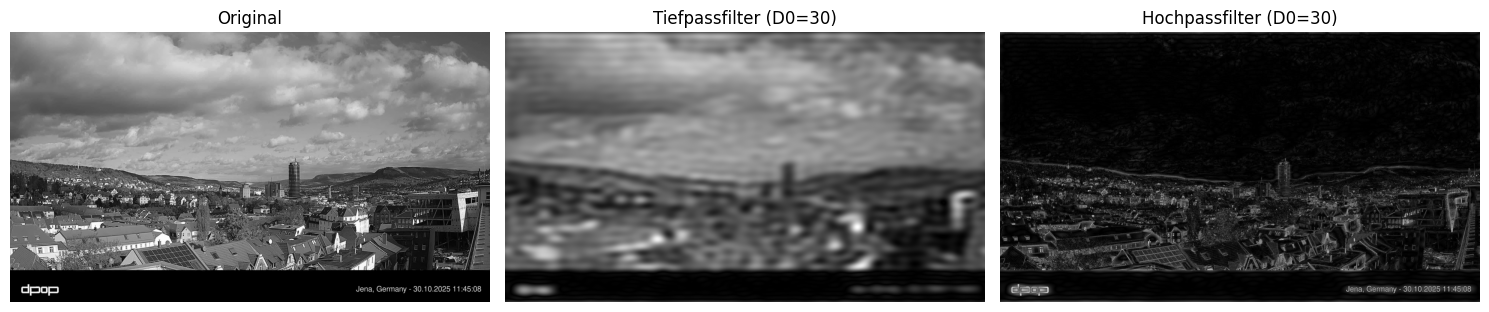

In [17]:
# Visualisierung der Ergebnisse
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Tiefpassfilter (Glättung)
axes[1].imshow(image_filtered_lowpass, cmap='gray')
axes[1].set_title(f'Tiefpassfilter (D0={D0})')
axes[1].axis('off')

# Hochpassfilter (Kantenextraktion)
axes[2].imshow(image_filtered_highpass, cmap='gray')
axes[2].set_title(f'Hochpassfilter (D0={D0})')
axes[2].axis('off')

plt.tight_layout()
plt.show()
